In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sts
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [2]:
data = pd.read_csv('pulsar_data_train.csv')
data['target_class'].value_counts()

for column in data.columns:
  missing = np.mean(data[column].isna()*100)
  print(f" {column} : {round(missing,1)}%")

Dup_Rows = data[data.duplicated()]
print("Повторяющиеся строки : \n {}".format(Dup_Rows))

data.drop_duplicates(keep = 'first', inplace = True)

Dup_Rows = data[data.duplicated()]
print("Повторяющиеся строки : \n {}".format(Dup_Rows))

  Mean of the integrated profile : 0.0%
  Standard deviation of the integrated profile : 0.0%
  Excess kurtosis of the integrated profile : 13.8%
  Skewness of the integrated profile : 0.0%
  Mean of the DM-SNR curve : 0.0%
  Standard deviation of the DM-SNR curve : 9.4%
  Excess kurtosis of the DM-SNR curve : 0.0%
  Skewness of the DM-SNR curve : 5.0%
 target_class : 0.0%
Повторяющиеся строки : 
 Empty DataFrame
Columns: [ Mean of the integrated profile,  Standard deviation of the integrated profile,  Excess kurtosis of the integrated profile,  Skewness of the integrated profile,  Mean of the DM-SNR curve,  Standard deviation of the DM-SNR curve,  Excess kurtosis of the DM-SNR curve,  Skewness of the DM-SNR curve, target_class]
Index: []
Повторяющиеся строки : 
 Empty DataFrame
Columns: [ Mean of the integrated profile,  Standard deviation of the integrated profile,  Excess kurtosis of the integrated profile,  Skewness of the integrated profile,  Mean of the DM-SNR curve,  Standard de

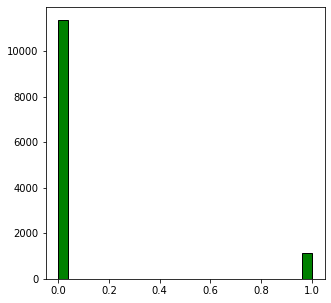

0.0    11375
1.0     1153
Name: target_class, dtype: int64

In [3]:
data = pd.read_csv('pulsar_data_train.csv')
fig, ax = plt.subplots(figsize = (5, 5))
ax.hist(data['target_class'], edgecolor = 'black', color='green', bins=25)
plt.show()
data['target_class'].value_counts()

In [4]:
def preparingData():
  data = pd.read_csv('pulsar_data_train.csv')
  data.drop([' Excess kurtosis of the integrated profile', ' Standard deviation of the DM-SNR curve', ' Skewness of the DM-SNR curve'], axis = 1, inplace=True)
  deletedIndex = 0
  for index, row in data.iterrows():
    if data['target_class'][index] == 0:
      data.drop([index], inplace=True)
      deletedIndex=deletedIndex+1
    if deletedIndex==10222:
      break
  return data

In [5]:
dataX = preparingData()
dataX.drop(['target_class'], axis = 1, inplace=True)
dataX

,Mean of the integrated profile,Standard deviation of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Excess kurtosis of the DM-SNR curve
31,36.710938,38.260242,20.296980,107.212375,0.115883
34,43.500000,28.491227,26.339870,39.585284,1.706102
40,66.851562,58.088038,2.232983,67.020903,0.841740
68,69.210938,35.257236,4.435122,2.345318,9.389613
73,126.554688,45.013333,0.308553,4.983278,5.938614
...,...,...,...,...,...
12523,124.312500,53.179053,-0.556021,7.186455,4.531382
12524,115.617188,46.784600,0.226757,6.140468,5.732201
12525,116.031250,43.213846,0.433088,0.785117,17.055215
12526,135.664062,49.933749,-0.226726,3.859532,7.398395


In [6]:
dataY = preparingData()
dataY.drop([' Mean of the integrated profile', ' Standard deviation of the integrated profile', ' Skewness of the integrated profile', ' Mean of the DM-SNR curve', ' Excess kurtosis of the DM-SNR curve'], axis = 1, inplace=True)
dataY

dataY.value_counts()

target_class
0.0             1153
1.0             1153
dtype: int64

In [7]:
time_start = time.time()
x_train, x_test, y_train, y_test = train_test_split(dataX, dataY, train_size=0.8, shuffle=True, random_state=271)

model = LogisticRegression(random_state=271)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)

print ('Время логистической регрессии: ', time.time()-time_start)

Время логистической регрессии:  0.03313493728637695


In [8]:
plt.rcParams['figure.figsize'] = (10, 10)
fig = px.imshow(confusion_matrix(y_test, y_predict), text_auto=True)
fig.update_layout(xaxis_title='Traget', yaxis_title='Prediction')

In [9]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92       233
         1.0       0.97      0.86      0.91       229

    accuracy                           0.91       462
   macro avg       0.92      0.91      0.91       462
weighted avg       0.92      0.91      0.91       462



In [10]:
time_start = time.time()

param_kernel = ('linear', 'rbf', 'poly', 'sigmoid')
parameters = {'kernel':param_kernel}
model=SVC()
grid_search_svm = GridSearchCV(estimator=model, param_grid=parameters, cv=6)
grid_search_svm.fit(x_train, y_train)

print ('Время SVM: ', time.time()-time_start)

Время SVM:  3.1724345684051514


In [11]:
best_model = grid_search_svm.best_estimator_
best_model.kernel

svm_preds = best_model.predict(x_test)
print(classification_report(y_test, svm_preds))

              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90       233
         1.0       0.94      0.85      0.89       229

    accuracy                           0.90       462
   macro avg       0.90      0.90      0.90       462
weighted avg       0.90      0.90      0.90       462



In [12]:
plt.rcParams['figure.figsize'] = (10, 10)
fig = px.imshow(confusion_matrix(y_test, svm_preds), text_auto=True)
fig.update_layout(xaxis_title='Traget', yaxis_title='Prediction')

In [13]:
time_start = time.time()

number_of_neighbors = np.arange(3, 10)
model_KNN = KNeighborsClassifier()
params = {"n_neighbors":number_of_neighbors}

grid_search = GridSearchCV(estimator=model_KNN, param_grid=params, cv=6)

grid_search.fit(x_train, y_train)

print ('Время KNN: ', time.time()-time_start)

print(grid_search.best_score_)

print(grid_search.best_estimator_)

knn_preds = grid_search.predict(x_test)

print(classification_report(y_test, knn_preds))

Время KNN:  0.5425961017608643
0.930044982162246
KNeighborsClassifier(n_neighbors=7)
              precision    recall  f1-score   support

         0.0       0.85      0.96      0.91       233
         1.0       0.95      0.83      0.89       229

    accuracy                           0.90       462
   macro avg       0.90      0.90      0.90       462
weighted avg       0.90      0.90      0.90       462



In [14]:
plt.rcParams['figure.figsize'] = (10, 10)
fig = px.imshow(confusion_matrix(y_test, knn_preds), text_auto=True)
fig.update_layout(xaxis_title='Traget', yaxis_title='Prediction')

In [15]:
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 59.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=ced1091ebf76bc28cd96b3ab12041ac06285f7f68370c0347ec7fc5f4a564659
  Stored in directory: /root/.cache/pip/wheels/a9/3a/67/06a8950e053725912e6a8c42c4a3a241410f6487b8402542ea
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55513 sha256=61836d1732fcaec97d5bb00b8b991ec2ee47715fee4f93f1e0b1676c2028659a
  Stored in directory: /root/.cache/pip/wheels/1c/63/3a/29954bca1a27ba100ed8c27973a78cb71b43dc67aed62e80c3
Successfully built umap-learn pynndescent


In [16]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import plotly.graph_objects as go
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
import umap

dataX

,Mean of the integrated profile,Standard deviation of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Excess kurtosis of the DM-SNR curve
31,36.710938,38.260242,20.296980,107.212375,0.115883
34,43.500000,28.491227,26.339870,39.585284,1.706102
40,66.851562,58.088038,2.232983,67.020903,0.841740
68,69.210938,35.257236,4.435122,2.345318,9.389613
73,126.554688,45.013333,0.308553,4.983278,5.938614
...,...,...,...,...,...
12523,124.312500,53.179053,-0.556021,7.186455,4.531382
12524,115.617188,46.784600,0.226757,6.140468,5.732201
12525,116.031250,43.213846,0.433088,0.785117,17.055215
12526,135.664062,49.933749,-0.226726,3.859532,7.398395


In [17]:
models = []
score1 = []
score2 = []

for i in range(2, 10):
  model = KMeans(n_clusters=i, random_state=123, init='k-means++').fit(dataX)
  models.append(model)
  score1.append(model.inertia_)
  score2.append(silhouette_score(dataX, model.labels_))

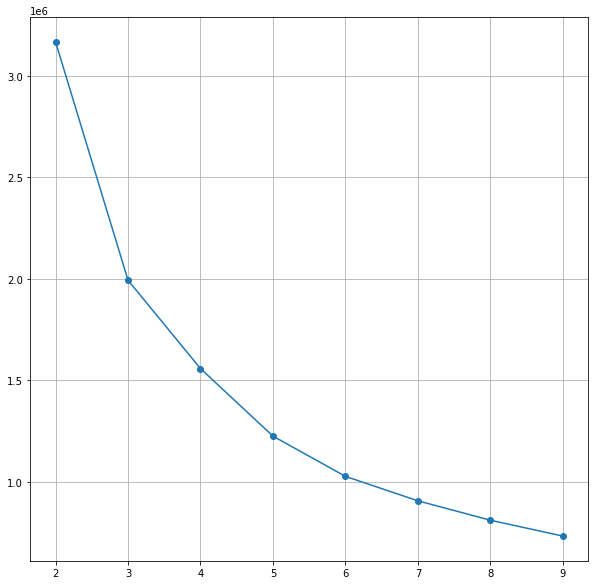

In [18]:
plt.grid()
plt.plot(np.arange(2, 10), score1, marker='o')
plt.show()

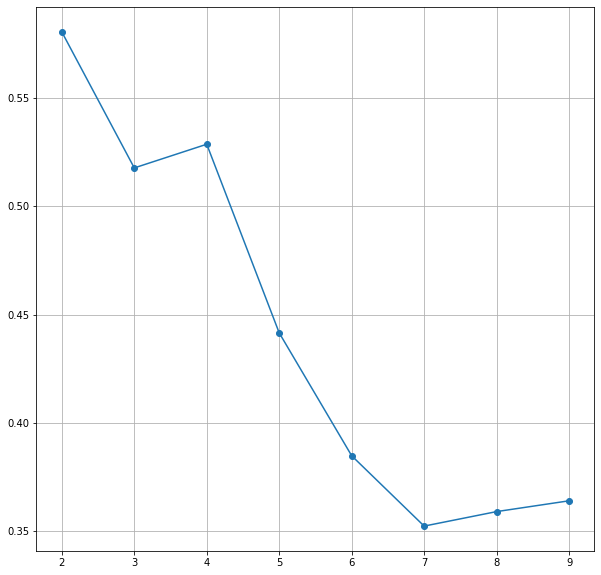

In [19]:
plt.grid()
plt.plot(np.arange(2, 10), score2, marker='o')
plt.show()

In [20]:
time_start_KMeans = time.time()
model1 = KMeans(n_clusters=2, random_state=123, init='k-means++')
model1.fit(dataX)
time_end_KMeans = time.time()-time_start_KMeans
model1.cluster_centers_

array([[105.41984154,  45.60197112,   1.8860498 ,   8.18611609,
          7.83736573],
       [ 40.53830087,  36.73971886,  22.61133191,  79.28668185,
          0.92554478]])

In [21]:
labels = model1.labels_
dataX['Claster'] = labels

dataX['Claster'].value_counts()

0    1628
1     678
Name: Claster, dtype: int64

In [22]:
fit = umap.UMAP(n_neighbors=5, min_dist=0.1, random_state=123)
u = fit.fit_transform(dataX)

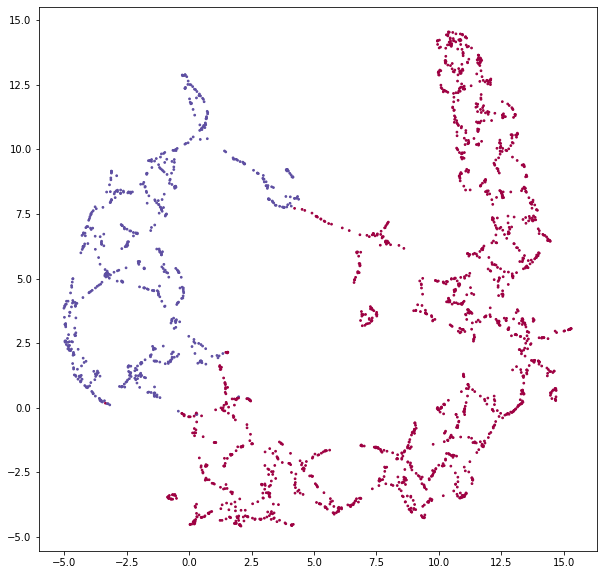

In [23]:
plt.scatter(u[:,0], u[:,1], c=dataX['Claster'], cmap="Spectral", s=3)

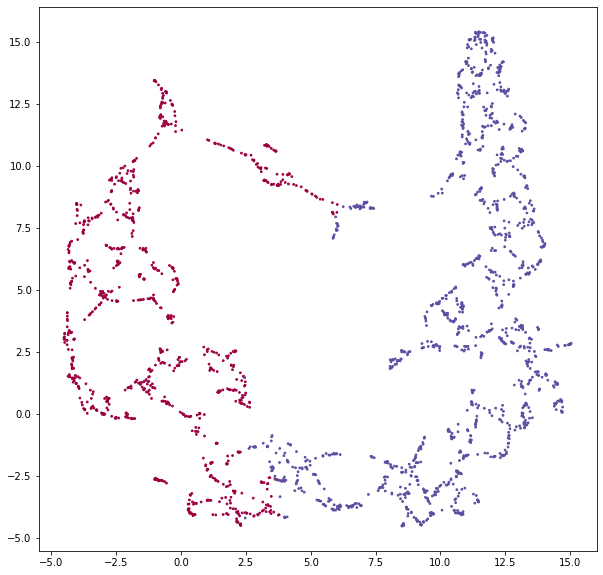

In [24]:
time_start_AC = time.time()
model2 = AgglomerativeClustering(2, compute_distances=True)
clastering=model2.fit(dataX)
time_end_AC = time.time()-time_start_AC
dataX['Claster']=clastering.labels_

fit = umap.UMAP(n_neighbors=5, min_dist=0.1, random_state=123)
u = fit.fit_transform(dataX)
plt.scatter(u[:,0], u[:,1], c=dataX['Claster'], cmap="Spectral", s=3)

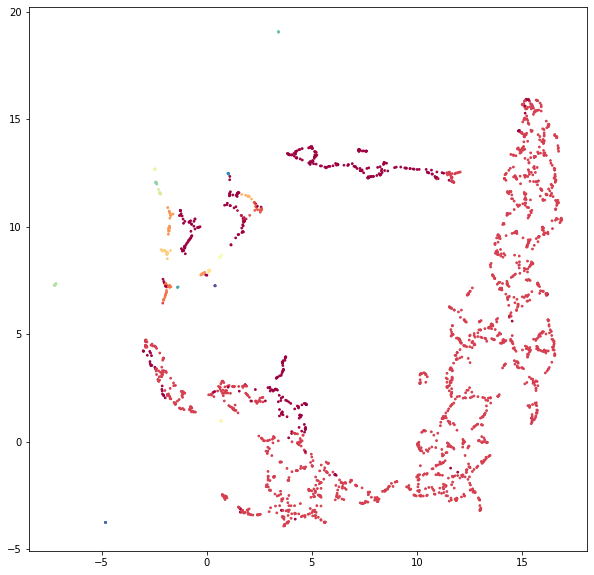

In [25]:
time_start_DBSCAN = time.time()
model3 = DBSCAN(eps=7, min_samples=5).fit(dataX)
time_end_DBSCAN = time.time()-time_start_DBSCAN
dataX['Claster'] = model3.labels_

fit = umap.UMAP(n_neighbors=5, min_dist=0.1, random_state=123)
u = fit.fit_transform(dataX)
plt.scatter(u[:,0], u[:,1], c=dataX['Claster'], cmap="Spectral", s=3)

In [26]:
print ('Время алгоритма k-means: ', time_end_KMeans)
print ('Время алгоритма иерархической кластеризации: ', time_end_AC)
print ('Время алгоритма DBSCAN: ', time_end_DBSCAN)

Время алгоритма k-means:  0.25606846809387207
Время алгоритма иерархической кластеризации:  0.3218715190887451
Время алгоритма DBSCAN:  0.03156089782714844


In [27]:
!pip3 install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 13.3 MB/s eta 0:00:00


In [28]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
import catboost as cb

In [29]:
dataX.drop(['Claster'], axis = 1, inplace=True)
dataX

,Mean of the integrated profile,Standard deviation of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Excess kurtosis of the DM-SNR curve
31,36.710938,38.260242,20.296980,107.212375,0.115883
34,43.500000,28.491227,26.339870,39.585284,1.706102
40,66.851562,58.088038,2.232983,67.020903,0.841740
68,69.210938,35.257236,4.435122,2.345318,9.389613
73,126.554688,45.013333,0.308553,4.983278,5.938614
...,...,...,...,...,...
12523,124.312500,53.179053,-0.556021,7.186455,4.531382
12524,115.617188,46.784600,0.226757,6.140468,5.732201
12525,116.031250,43.213846,0.433088,0.785117,17.055215
12526,135.664062,49.933749,-0.226726,3.859532,7.398395


In [30]:
dataY

,target_class
31,1.0
34,1.0
40,1.0
68,1.0
73,1.0
...,...
12523,0.0
12524,0.0
12525,0.0
12526,0.0


In [31]:
x_train, x_test, y_train, y_test = train_test_split(dataX, dataY, train_size=0.8)

random_forest = RandomForestClassifier(max_depth = 15, min_samples_split=10).fit(x_train, y_train)

In [32]:
y_preds_d = random_forest.predict(x_train)
print('F1 мера для тренировочных данных', f1_score(y_preds_d, y_train, average='macro'))

y_pred = random_forest.predict(x_test)
print('F1 мера для тестовых данных', f1_score(y_pred, y_test, average='macro'))

F1 мера для тренировочных данных 0.964199988704394
F1 мера для тестовых данных 0.91061847935335


In [33]:
time_start_forest_1 = time.time()
random_forest = RandomForestClassifier()

params_grid = {
    'max_depth': [12, 18],
    'min_samples_leaf': [3, 10],
    'min_samples_split': [6, 12],
}

grid_search_random_forest = GridSearchCV(estimator=random_forest, param_grid = params_grid, scoring = 'f1_macro', cv=4)

grid_search_random_forest.fit(x_train, y_train)
time_end_forest_1 = time.time()-time_start_forest_1

In [34]:
best_model = grid_search_random_forest.best_estimator_

In [35]:
time_start_forest_1 = time.time()
y_preds_d = best_model.predict(x_train)
print('F1 мера для тренировочных данных',f1_score(y_preds_d, y_train, average='macro'))

y_pred = best_model.predict(x_test)
print('F1 мера для тестовых данных',f1_score(y_pred, y_test, average='macro'))
time_end_forest_1 += time.time()-time_start_forest_1

print('Время работы баггинга: ', time_end_forest_1)

F1 мера для тренировочных данных 0.9593111671869718
F1 мера для тестовых данных 0.9105509461048436
Время работы баггинга:  12.38014841079712


In [36]:
time_start_forest_1 = time.time()
model_catboost_clf = cb.CatBoostClassifier(iterations = 3000, task_type='GPU', devices='0')

model_catboost_clf.fit(x_train, y_train)
time_end_forest_1 = time.time()-time_start_forest_1

Learning rate set to 0.01218
0:	learn: 0.6750145	total: 56.1ms	remaining: 2m 48s
1:	learn: 0.6545519	total: 103ms	remaining: 2m 34s
2:	learn: 0.6365162	total: 149ms	remaining: 2m 28s
3:	learn: 0.6161863	total: 180ms	remaining: 2m 14s
4:	learn: 0.5993640	total: 227ms	remaining: 2m 15s
5:	learn: 0.5818150	total: 272ms	remaining: 2m 15s
6:	learn: 0.5658922	total: 292ms	remaining: 2m 4s
7:	learn: 0.5495651	total: 321ms	remaining: 1m 59s
8:	learn: 0.5358230	total: 349ms	remaining: 1m 56s
9:	learn: 0.5221341	total: 384ms	remaining: 1m 54s
10:	learn: 0.5088494	total: 415ms	remaining: 1m 52s
11:	learn: 0.4963707	total: 445ms	remaining: 1m 50s
12:	learn: 0.4840002	total: 470ms	remaining: 1m 48s
13:	learn: 0.4717939	total: 494ms	remaining: 1m 45s
14:	learn: 0.4603273	total: 518ms	remaining: 1m 43s
15:	learn: 0.4485104	total: 541ms	remaining: 1m 40s
16:	learn: 0.4389069	total: 593ms	remaining: 1m 44s
17:	learn: 0.4272014	total: 620ms	remaining: 1m 42s
18:	learn: 0.4177573	total: 644ms	remaining: 

In [37]:
time_start_forest_1 = time.time()
y_preds_t = model_catboost_clf.predict(x_train, task_type='GPU')
print('F1 мера для тренировочных данных',f1_score(y_preds_t, y_train, average='macro'))

y_preds = model_catboost_clf.predict(x_test, task_type='GPU')
print('F1 мера для тестовых данных',f1_score(y_preds, y_test, average='macro'))
time_end_forest_1 += time.time()-time_start_forest_1

print('Время работы бустинга: ', time_end_forest_1)

F1 мера для тренировочных данных 0.9859000676410905
F1 мера для тестовых данных 0.9149785535312354
Время работы бустинга:  108.20762515068054
